In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os

import networkx as nx
from scipy.spatial import distance
from scipy.stats import spearmanr
from scipy.stats import kde

from pathlib import Path

In [2]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

Collect the file names 

In [12]:
# get current working directory
path = os.getcwd() + '/cycles/'

folders = os.listdir(path)
try:
    folders.remove('.DS_Store')
    folders.remove('geom figures')
except:
    pass

# for each folder, get the name of the files in it
folders_dict = {}
for folder in folders:

    files = os.listdir(path + '/' + folder)
    try:
        files.remove('.DS_Store')
    except:
        pass
    # remove the final ".png" part of the string name
    
    if len(files) > 0:
        files = [f[:-4] for f in files]

        # create a triple dividing each f in three parts by the "_" 
        files = [f.split('_') for f in files]

    folders_dict[folder] = files

folders_dict


{'polygon selfintersect': [['53653', '10182521', '39753'],
  ['32715', '12397546', '18815'],
  ['68151', '45443720', '4251'],
  ['88946', '63076897', '20046'],
  ['24359', '32445832', '10459'],
  ['19198', '31796745', '5298'],
  ['94521', '81339233', '25621'],
  ['39295', '57965483', '25395'],
  ['74110', '54710655', '5210'],
  ['69685', '94696407', '785'],
  ['85260', '26534202', '16360'],
  ['20467', '15650185', '6567'],
  ['21524', '68937507', '7624'],
  ['76455', '54162239', '7555'],
  ['61637', '27048518', '47737'],
  ['6356', '3532008', '6356'],
  ['89024', '76991038', '20124'],
  ['17368', '53693967', '3468'],
  ['41605', '8020200', '27705'],
  ['93584', '63398467', '24684'],
  ['49127', '78416496', '35227'],
  ['43347', '65347308', '29447'],
  ['92282', '97637733', '23382'],
  ['43656', '75337', '29756'],
  ['45223', '99568567', '31323'],
  ['49360', '29274575', '35460'],
  ['24722', '6554222', '10822'],
  ['53168', '43939908', '39268'],
  ['14925', '81787275', '1025'],
  ['709

In [13]:
# remove diagonal small and large from folders_dict
del folders_dict['diagonal small']
del folders_dict['diagonal large']

Make some basic statistics

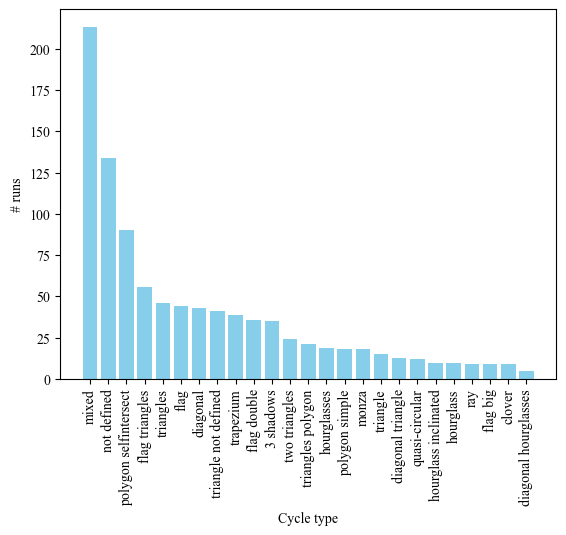

In [14]:
# create a list of the keys of the dictionary
keys = list(folders_dict.keys())
keys_filtered = [k for k in keys if len(folders_dict[k]) > 0]

# create a list of the lengths of the values
lengths = [len(v) for v in list(folders_dict.values())]

# sort the keys by the lengths of the values
keys_sorted = [x for _, x in sorted(zip(lengths, keys))]
keys_sorted.reverse()

# plot the number of files in each folder

plt.bar(keys_sorted, [len(folders_dict[k]) for k in keys_sorted], color='skyblue')
plt.xlabel('Cycle type')
plt.ylabel('# runs')
# label 90 degrees
plt.xticks(rotation=90)
plt.show()




Counting clustered cycles

In [15]:
# count all the cycles
lengths = [len(folders_dict[k]) for k in keys_sorted]
lengths_filt = [len(folders_dict[k]) for k in keys_sorted if (k != 'not defined' and k != 'mixed')]
print(sum(lengths_filt)/sum(lengths))




0.6418988648090815


Now, analyze the mean values of the parameters for each limit cycle shape

In [17]:
df_res_q1 = pd.read_excel("df_res_q1.xlsx")
# rename 'Unnamed: 0' as 'id'
df_res_q1.rename(columns={'Unnamed: 0.1': 'id'}, inplace=True)
df_res_q1

,id,Unnamed: 0,seed,n_exp,n_sim,num_weeks,num_agents,capacity,threshold,contagious_threshold,...,mean_attendance,mean_contagious,mean_present_contagious,std_attendance,std_contagious,std_present_contagious,argmax_acft_attendance,max_acft_attendance,argmax_acft_contagious,max_acft_contagious
0,216,216,57055118,sett24_7,216,200,2000,2000,0.55,0.15,...,1063.44,1711.79,897.09,312.711443,312.695516,452.476852,12,0.881908,6,0.897392
1,562,562,64581396,sett24_7,562,200,1500,1500,0.35,0.20,...,215.92,200.37,126.29,65.112622,66.088525,75.536123,16,0.841549,16,0.841199
2,761,761,82080877,sett24_7,761,200,3500,3500,0.75,0.15,...,2445.36,2798.42,1746.53,714.936256,631.632443,756.944310,10,0.899042,10,0.898912
3,775,775,3253700,sett24_7,775,200,1000,500,0.70,0.10,...,377.26,409.64,145.29,51.904455,102.247789,128.776341,4,0.879386,4,0.946112
4,1004,1004,14209494,sett24_7,1004,200,500,500,0.60,0.15,...,289.04,246.02,126.53,55.092635,61.054562,93.413324,4,0.952473,4,0.954896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,99761,761,96677543,sett24_2,761,200,1000,500,0.85,0.10,...,484.09,750.78,374.57,19.899294,250.842205,414.936025,8,0.922171,4,0.940787
965,99834,834,85119783,sett24_2,834,200,3000,3000,0.85,0.15,...,2394.84,2698.04,2095.91,808.493621,509.235366,853.722930,10,0.899330,10,0.898769
966,99887,887,28102632,sett24_2,887,200,3500,3500,0.50,0.35,...,1569.84,1376.95,1149.87,198.100718,296.667301,405.246657,12,0.874553,12,0.872521
967,99914,914,22470269,sett24_2,914,200,1000,1000,0.75,0.20,...,744.88,666.88,413.42,164.305282,85.798051,171.973090,12,0.881728,12,0.873678


In [18]:
def filt_df(df, cycle_type):
    list_runs = folders_dict[cycle_type]
    id_list = [int(i[0]) for i in list_runs]
    seed_list = [int(i[1]) for i in list_runs]
    n_sim_list = [int(i[2]) for i in list_runs]
    df_filtered = df[df['id'].isin(id_list)]
    return df_filtered


col_to_check = ['threshold', 'contagious_threshold', 'contagious_duration', 'people_memory_weight','contagious_thresholdNotPresent', 'SIR_AgentsRecoveryTime', 'contagiousness', 'num_agents', 'argmax_acft_contagious']
types = list(folders_dict.keys())

# create a df with both the mean and std of each column for each cycle type

df_stats = pd.DataFrame(columns=col_to_check, index=types)

for cycle_type in types:
    df_filtered = filt_df(df_res_q1, cycle_type)
    for col in col_to_check:
        mean = df_filtered[col].mean()
        std = df_filtered[col].std()
        df_stats.loc[cycle_type, col] = (mean, std)

df_stats_to_export = df_stats.copy()
# split the tuple in two columns and rename them
# for col in col_to_check:
#     df_stats_to_export[col + '_mean'] = df_stats_to_export[col].apply(lambda x: x[0])
#     df_stats_to_export[col + '_std'] = df_stats_to_export[col].apply(lambda x: x[1])
#     df_stats_to_export.drop(col, axis=1, inplace=True)

# enter in each cell and round every element of the tuple at the second decimal
for col in col_to_check:
    df_stats_to_export[col] = df_stats_to_export[col].apply(lambda x: (round(x[0], 2), round(x[1], 2)))

# in column n_agents, round the mean with int
df_stats_to_export['num_agents'] = df_stats_to_export['num_agents'].apply(lambda x: (int(x[0]), int(x[1])))

# substitute every element of the tuple with a string of the form 'mean (std)'
for col in col_to_check:
    df_stats_to_export[col] = df_stats_to_export[col].apply(lambda x: str(x[0]) + ' (' + str(x[1]) + ')')

dict_variables = {
    'threshold': '$t_a$',
    'contagious_threshold': '$t_i$',
    'contagious_duration': '$d_i$',
    'people_memory_weight': '$m$',
    'contagious_thresholdNotPresent': '$t_p$',
    'SIR_AgentsRecoveryTime': '$t_r$',
    'contagiousness': '$c$',
    'num_agents': '$n$',
    'capacity_pct': '$c_p$',
    'argmax_acft_contagious': '$argmax(ACF(C))$'
}


# rename the columns
df_stats_to_export.rename(columns=dict_variables, inplace=True)

df_stats_to_export.to_excel('df_stats_v1.xlsx')
df_stats






# make the df of the means

df_means = pd.DataFrame(columns=col_to_check, index=types)

for cycle_type in types:
    df_filtered = filt_df(df_res_q1, cycle_type)
    for col in col_to_check:
        mean = df_filtered[col].mean()
        df_means.loc[cycle_type, col] = mean

min_max_values = [(0.05,1), (0.05,1), (1,10), (0.05,1), (0.05,1), (0,10), (0.02,0.5), (500,4000)]
min_max_dict = dict(zip(col_to_check, min_max_values))

# df_means to export

df_means_to_export = df_means.copy()

# enter in each cell and round every element of the tuple at the second decimal
for col in col_to_check:
    df_means_to_export[col] = df_means_to_export[col].apply(lambda x: round(x, 2))

# in column n_agents, round the mean with int
df_means_to_export['num_agents'] = df_means_to_export['num_agents'].apply(lambda x: int(x))

# rename the columns
df_means_to_export.rename(columns=dict_variables, inplace=True)

df_means_to_export.to_excel('df_means_v0.xlsx')



# normalize the values of the df_means

df_norm = df_means.copy()

for col in col_to_check:
    if col == 'argmax_acft_contagious':
        continue
    min_val = min_max_dict[col][0]
    max_val = min_max_dict[col][1]
    df_norm[col] = (df_means[col] - min_val) / (max_val - min_val)

# renove the row 'non defined' from the df_norm

df_norm = df_norm.drop('not defined')
df_norm = df_norm.drop('mixed')
# remove column argmax_acft_contagious
df_norm = df_norm.drop('argmax_acft_contagious', axis=1)
df_norm.to_excel('df_norm_v0.xlsx')
df_norm


,threshold,contagious_threshold,contagious_duration,people_memory_weight,contagious_thresholdNotPresent,SIR_AgentsRecoveryTime,contagiousness,num_agents
polygon selfintersect,0.50117,0.067251,0.77037,0.395906,0.276023,0.316667,0.594444,0.614286
flag big,0.532164,0.116959,0.666667,0.660819,0.385965,0.544444,0.657407,0.603175
flag,0.906699,0.0311,0.805556,0.397129,0.17823,0.302273,0.550189,0.571429
diagonal hourglasses,0.526316,0.231579,0.511111,0.052632,0.357895,0.42,0.666667,0.628571
quasi-circular,0.719298,0.061404,0.759259,0.399123,0.333333,0.391667,0.465278,0.809524
polygon simple,0.526316,0.070175,0.728395,0.461988,0.318713,0.427778,0.662037,0.539683
hourglass,0.573684,0.110526,0.588889,0.347368,0.221053,0.51,0.516667,0.671429
clover,0.678363,0.02924,0.851852,0.584795,0.216374,0.288889,0.527778,0.68254
triangles,0.528604,0.094966,0.625604,0.446224,0.187643,0.526087,0.667572,0.580745
hourglass inclinated,0.726316,0.052632,0.711111,0.631579,0.126316,0.53,0.583333,0.614286


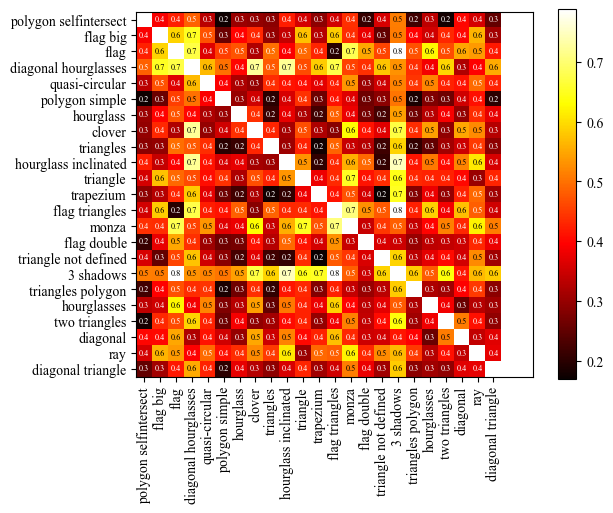

In [19]:
# consider a n-dimensional space with the columns of df_stats as axes
# consider each point as a vector in this space, which is a row of df_stats (only the mean values)
# compute the distance between each pair of points

# create a list of the types of cycles without 'non defined'
types_ok = types.copy()
types_ok.remove('not defined')
types_ok.remove('mixed')

# create a matrix of distances
dist_matrix = np.zeros((len(types_ok), len(types)))

for i in range(len(types_ok)):
    for j in range(len(types_ok)):
        dist_matrix[i, j] = distance.euclidean(df_norm.iloc[i, :], df_norm.iloc[j, :])

# substitute 0 with np.nan
dist_matrix[dist_matrix == 0] = np.nan

# make an heatmap of the distances

plt.imshow(dist_matrix, cmap='hot', interpolation='nearest')

# Aggiungi i numeri sulle celle
for i in range(dist_matrix.shape[0]):
    for j in range(dist_matrix.shape[1]):
        color = 'black' if dist_matrix[i, j] > 0.5 else 'white'
        plt.text(j, i, f'{dist_matrix[i, j]:.1f}', ha='center', va='center', color=color, fontsize=6)

# add the label of the axes
plt.xticks(range(len(types_ok)), types_ok, rotation=90)
plt.yticks(range(len(types_ok)), types_ok)
plt.colorbar()
plt.show()



In [20]:
# write a list of the 10 shortest distances starting from dist_matrix
matr_flat_sort = np.argsort(dist_matrix.flatten())

# add the next closest point
old_ij = []
for k in range(20):
    # find the closest point to the network
    closest = matr_flat_sort[k]
    i , j = np.unravel_index(closest, dist_matrix.shape)

    # check if the two points are already in the list
    if (i, j) in old_ij or (j, i) in old_ij:
        continue
    print(f'd({types_ok[i]},{types_ok[j]}) = {dist_matrix[i, j]:.2f}')

    old_ij.append((i, j))




d(triangle not defined,trapezium) = 0.17
d(polygon simple,polygon selfintersect) = 0.18
d(triangles,trapezium) = 0.18
d(two triangles,polygon selfintersect) = 0.18
d(polygon simple,triangles polygon) = 0.18
d(flag triangles,flag) = 0.20
d(polygon simple,triangles) = 0.20
d(diagonal triangle,polygon simple) = 0.20
d(triangles,triangles polygon) = 0.21
d(trapezium,hourglass inclinated) = 0.21


Network strict

22


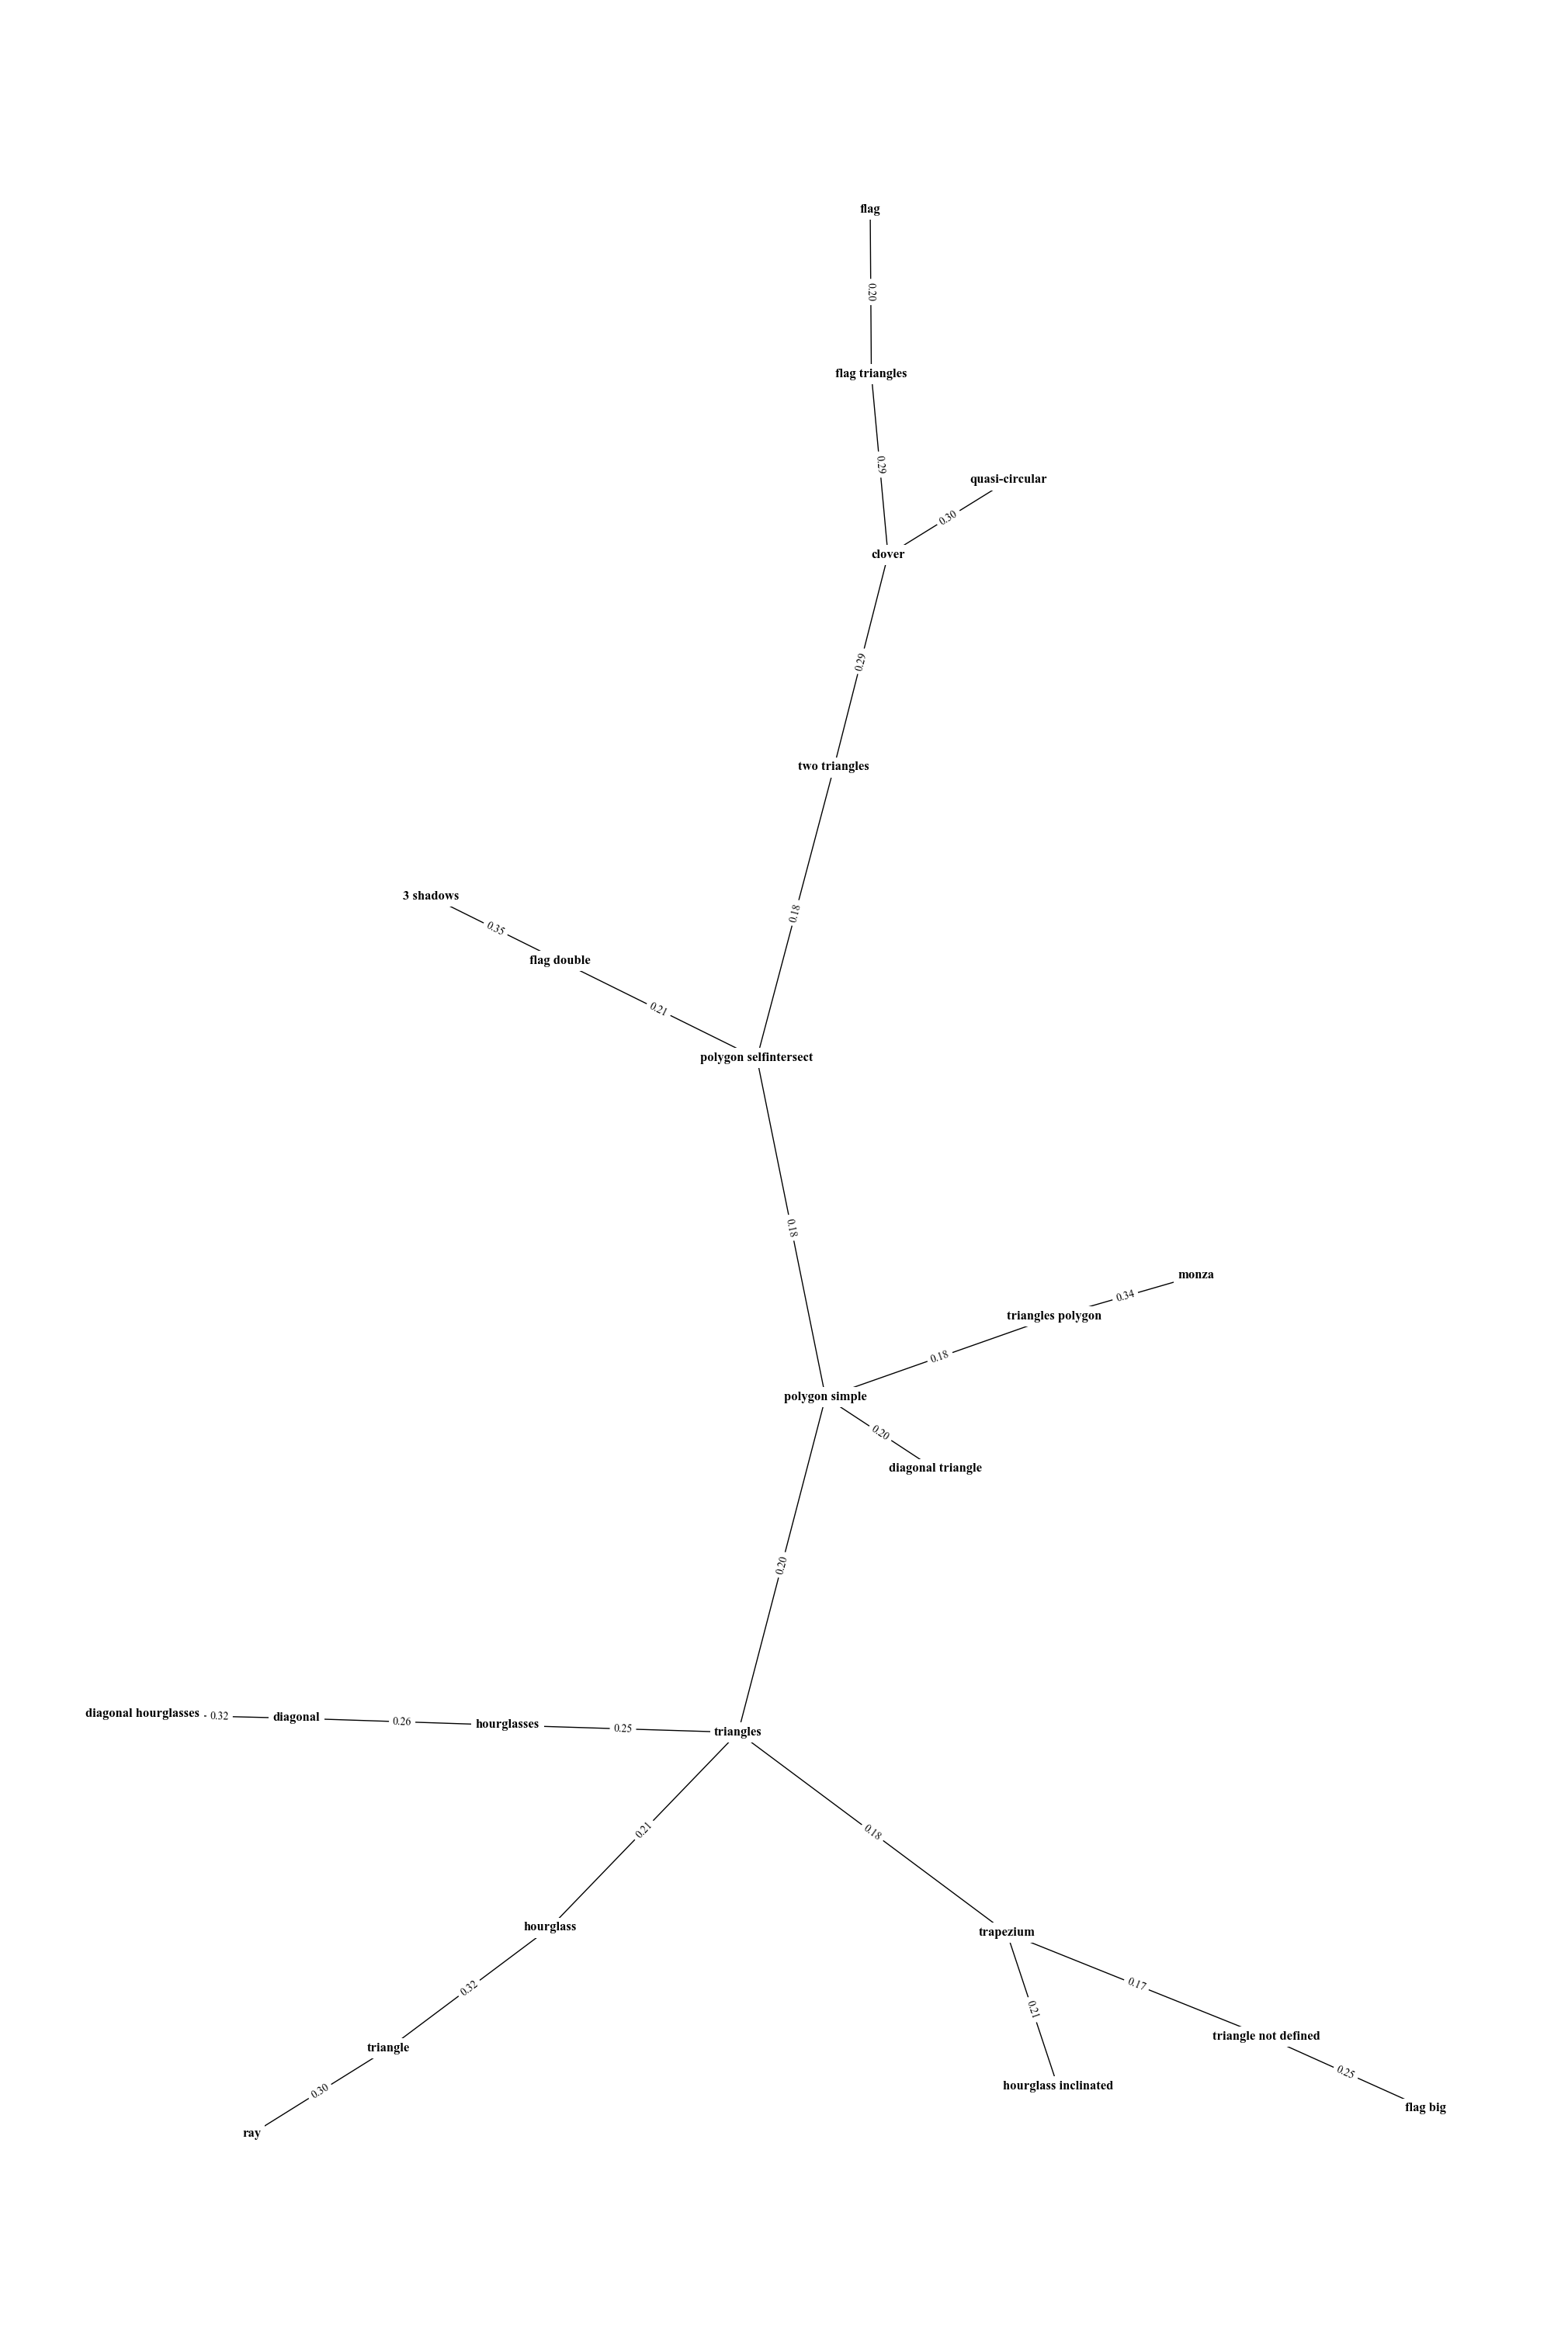

In [24]:
# create a network that connects progressively the points that are closer to each other
# start from the two closest points
# add the next closest point to the network
# and finish when the giant component is formed

G = nx.Graph()

# find the two closest points
matr_flat_sort = np.argsort(dist_matrix.flatten())

# get the indices of the two closest points
# i, j = np.unravel_index(matr_flat_sort[0], dist_matrix.shape)
# G.add_edge(types_ok[i], types_ok[j])

# add the next closest point
for k in range(len(matr_flat_sort)):
    # find the closest point to the network
    closest = matr_flat_sort[k]
    i , j = np.unravel_index(closest, dist_matrix.shape)

    # check if the two points are already in the network
    if types_ok[i] in G.nodes and types_ok[j] in G.nodes:
        # check if the two points are already connected
        #print(i, j, nx.has_path(G, types_ok[i], types_ok[j]))
        
        if nx.has_path(G, types_ok[i], types_ok[j]):
            continue

    G.add_edge(types_ok[i], types_ok[j], weight=dist_matrix[i, j])
    
    # remove the first point from matr_flat_sort
    matr_flat_sort = np.delete(matr_flat_sort, 0)

    # check if the giant component is formed and the network has all the types
    if nx.is_connected(G) and len(G.nodes) == len(types_ok):
        break

# # now, connect the points which distance is lower then alpha
# alpha = 0.2

# for i in range(len(types_ok)):
#     for j in range(len(types_ok)):
#         if dist_matrix[i, j] < alpha:
#             G.add_edge(types_ok[i], types_ok[j])

# print the number of links
print(len(G.edges))

# show the network
plt.figure(figsize=(20, 30))
pos = nx.spring_layout(G, k=0.1)
nx.draw(G, pos, with_labels=True, node_size=0, font_family='Times New Roman', #font_size=18, 
        font_weight='bold', bbox=dict(facecolor='white', edgecolor='none'))

edge_labels = nx.get_edge_attributes(G, 'weight')
rounded_edge_labels = {edge: f'{weight:.2f}' for edge, weight in edge_labels.items()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=rounded_edge_labels, font_family='Times New Roman')

plt.show()
